# Predicting Stock Behavior
## Monte Carlo Simulation

Using Monte Carlo methods, simulate future stock price outcomes for Apple ($AAPL) using Python. You can read more about Monte Carlo simulation (in a finance context) [here](https://u4221007.ct.sendgrid.net/ls/click?upn=qwT-2Bl0U064-2B7oRNpPgUyaxLnv394QhRsufUUKOJx9boPP0tnbz9-2FSOfYEqrS8C-2FtDIqx0m2wJ5LAXFP2330BY-2FNOaz-2BHxVo3OhEmK177rUY-3Di1yA_VOwQZ2qUIrhb5O-2BDD16GgBWrzly3TNs9HEHyLrptMQkb9Asn1qFeCqDpVxIjR7C87cY2fgItcOmiHPh7P8MAuR-2Bh9JY-2BXVPmixESJQbKJvZXAVOi66SJeGn147Wh-2Bc7Mi9RCrz07h4MYga3qhoA3VJs6KtJZ-2FEZJRs8NQ9BSe-2FSmYlu7fwRxdKEDP3uSmtSIYsQ3QhmCfODHqGfvAnl-2BWVpYzTnu3up2xRILpKlmoT4-3D).

Below is code using Python to grab the initial stock price data for Apple, to help get you started:

In [130]:
# Import required libraries
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
from pandas_datareader import data
apple = data.DataReader('AMD', 'yahoo',start='1/1/2020')
apple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,49.250000,46.630001,46.860001,49.099998,80331100,49.099998
2020-01-03,49.389999,47.540001,48.029999,48.599998,73127400,48.599998
2020-01-06,48.860001,47.860001,48.020000,48.389999,47934900,48.389999
2020-01-07,49.389999,48.040001,49.349998,48.250000,58061400,48.250000
2020-01-08,48.299999,47.139999,47.849998,47.830002,53767000,47.830002


<IPython.core.display.Javascript object>


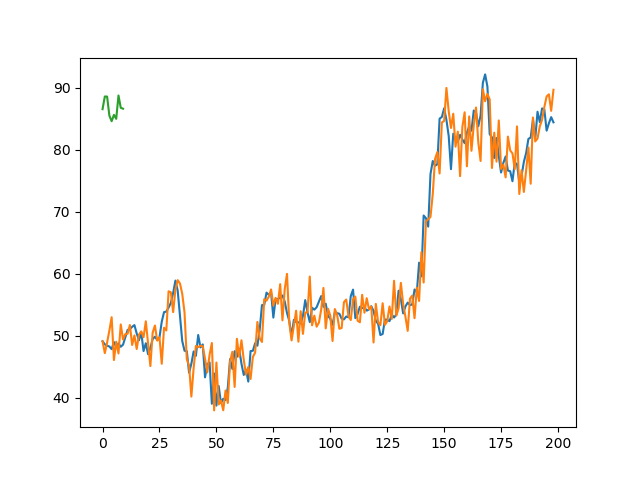

In [131]:
%matplotlib notebook
price = apple["Close"]
PDR = {"PDR": [np.log(price[i]/price[i-1]) for i in range(1, len(price))], 
       "Date": price.index[1:]}
ADR = np.mean(PDR["PDR"])
variance = np.var(PDR["PDR"])
drift = ADR - variance/2
stdev = np.sqrt(variance)
# cdf = (1 + math.erf(np.random.rand()/np.sqrt(2)))/2
cdf = norm.ppf(np.random.rand())
# cdf = math.erf(np.random.rand())
r = cdf*stdev
todays_price = price[0]
next_price = todays_price * np.exp(drift + r)

def predict(price):
    PDR = [np.log(price[i]/price[i-1]) for i in range(1, len(price))]
    variance = np.var(PDR)
    stdev = np.sqrt(variance)
    ADR = np.mean(PDR)
    drift = ADR - variance/2
    prediction = np.zeros(len(price))
    
    prediction[0] = price[0]
    for i in range(1, len(price)):
        r = norm.ppf(np.random.rand())*stdev
        prediction[i] = price[i-1] * np.exp(drift + r)
        
    return prediction
    

out = {"Date": price.index, "Real": price.values, "Predicted": predict(price.values)}
plt.plot(out["Real"], label="Real Prices")
plt.plot(out["Predicted"], label="Predicted Values")

<IPython.core.display.Javascript object>


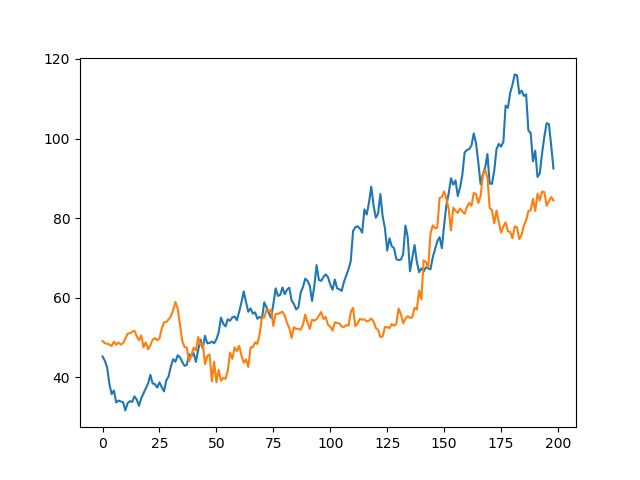

In [145]:
def gen_params(price):
    PDR = [np.log(price[i]/price[i-1]) for i in range(1, len(price))]
    variance = np.var(PDR)
    stdev = np.sqrt(variance)
    ADR = np.mean(PDR)
    drift = ADR - variance/2
    return drift, stdev

def gen_future(initial_price, params, num_days=10):
    drift = params[0]
    stdev = params[1]
    prediction = np.zeros(num_days)
    for i in range(num_days):
        r = norm.ppf(np.random.rand())*stdev
        if i == 0: prediction[i] = initial_price * np.exp(drift + r)
        else: prediction[i] = prediction[i-1] * np.exp(drift + r)
            
    return prediction

p0 = price.values[0]
params = gen_params(price)
plt.plot(gen_future(p0, params, len(price)))
plt.plot(price.values)

In [159]:
from scipy.stats import norm
import numpy as np
from pandas_datareader import data

class Stocks:
    def __init__(self, name, start="1/1/2020", database="yahoo", time_of_day="Close"):
        self.history = data.DataReader(name, database,start=start)
        
        self.price = self.history[time_of_day]
        self.PDR = [np.log(price[i]/price[i-1]) for i in range(1, len(price))]
        variance = np.var(self.PDR)
        
        self.stdev = np.sqrt(variance)
        self.ADR = np.mean(self.PDR)
        self.drift = self.ADR - variance/2
    
    def gen_future(self, initial, num_days=10):
        prediction = np.zeros(num_days)
        
        if type(initial) == str:
            initial_price = self.price.loc[initial]
        else:
            initial_price = initial
            
        for i in range(num_days):
            r = norm.ppf(np.random.rand())*self.stdev
            if i == 0: prediction[i] = initial_price * np.exp(self.drift + r)
            else: prediction[i] = prediction[i-1] * np.exp(self.drift + r)
                
        return prediction
            
    def replicate(self):
        prediction = np.zeros(len(self.price))
        prediction[0] = self.price[0]
        for i in range(1, len(self.price)):
            r = norm.ppf(np.random.rand())*self.stdev
            prediction[i] = self.price[i-1] * np.exp(self.drift + r)
        return prediction

In [164]:
X = Stocks("X")

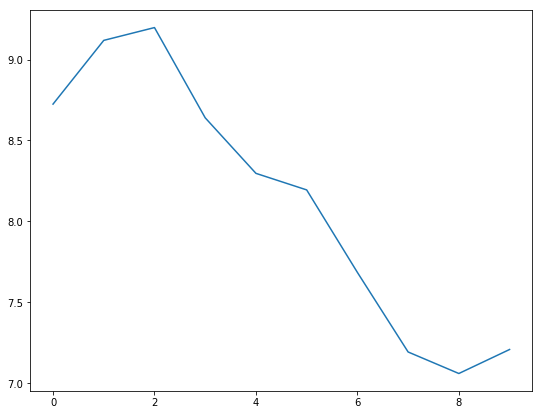

In [199]:
%matplotlib inline
plt.figure(figsize=(9, 7))
plt.plot(X.gen_future("2020-10-09", 10))